## Theil-Sen Regression

* [WikiPedia](https://en.wikipedia.org/wiki/Theil%E2%80%93Sen_estimator) 
* [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_theilsen.html) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

#### Generate data

45


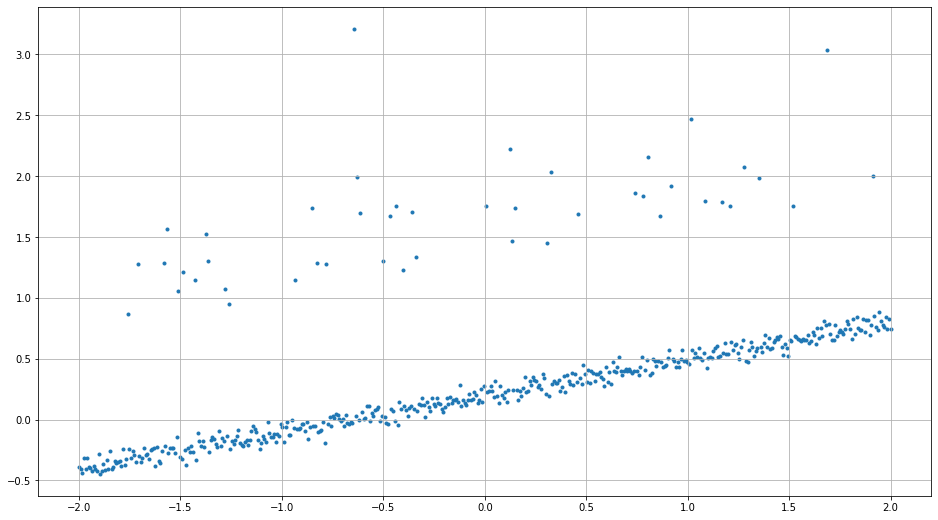

In [ ]:
# Equation of a line : y = mx + c
M = 0.3
C = 0.2
N = 500
x = np.linspace(-2,2,N)
y = M*x + C
# add simple random
y = y + np.random.normal(loc=0.0, scale=0.25, size=N) / 5.0 
# for some points add more random
r = np.random.normal(loc=0.0, scale=0.6, size=N) 
# r[np.abs(r)<0.75] = 0
r[r<0.75] = 0
print(np.count_nonzero(r))
y = y + r*1.5
plt.figure(figsize=(16,9))
plt.scatter(x,y, marker=".")
plt.grid()

#### Theil-Sen calculation

* Slope = Median of all pair wise slopes
* c = median of pair wise residuals

In [ ]:
slopes = []
for i,x1 in enumerate(x):
    y1 = y[i]
    for j in range(i+1, N):
        x2 = x[j]
        y2 = y[j]
        if x1 != x2:
            slopes.append( (y2-y1)/(x2-x1) )

estimated_slope = np.median(slopes)
intercepts = y - estimated_slope*x
estimated_intercept = np.median(intercepts)

print(f"Actual slope:{M:.4f}, Actual intercept:{C:.4f}")
print(f"estimated_slope:{estimated_slope:.4f}, estimated_intercept:{estimated_intercept:.4f}")

Actual slope:0.3000, Actual intercept:0.2000
estimated_slope:0.2990, estimated_intercept:0.2008


0.20084694807364173


#### Try Linear regression for comparision

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x.reshape(-1,1),y.reshape(-1,1))
print(f"Linear regression solpe: {lr_model.coef_} , intercept: {lr_model.intercept_}")

Linear regression solpe: [[0.28437334]] , intercept: [0.33486234]


#### let's plot both estimators

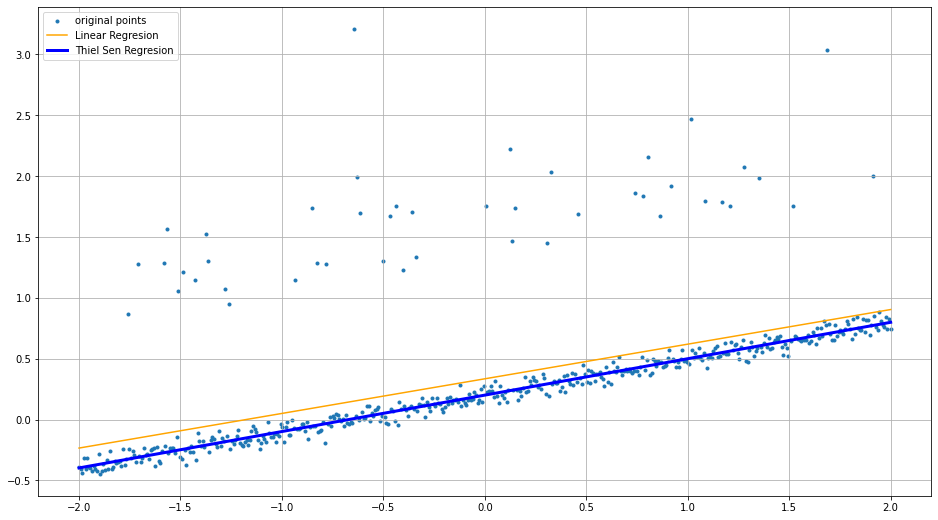

In [ ]:
lr_line = x*lr_model.coef_[0][0] +  lr_model.intercept_[0]
ts_line = x*m + estimated_intercept

plt.figure(figsize=(16,9))
plt.scatter(x,y,  marker=".", label="original points")
plt.plot(x,lr_line,c="orange", label="Linear Regresion")
plt.plot(x,ts_line,c="blue", linewidth=3,label="Thiel Sen Regresion")
plt.grid()
plt.legend()